In [169]:
PRFX='DevTrainTestDiff0702'
p_o = f'../output/{PRFX}'

In [170]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

import pandas as pd
import numpy as np
from pathlib import Path

from tqdm import tqdm

import pickle

def nfiles(pp):
    return len(list(pp.iterdir()))

def show_sample_images(p):
    fns = np.random.choice(list(p.iterdir()), 5)
    for i, fn in enumerate(fns):
        fig=plt.figure(figsize=(2, 2))
        im = Image.open(fn)
        plt.title(fn)
        plt.imshow(im)

In [171]:
Path(p_o).mkdir(exist_ok=True)

# files

In [172]:
p = '../input/aptos2019-blindness-detection'
pp = Path(p)

In [173]:
nfiles(pp/'train_images'), nfiles(pp/'test_images')

(3662, 1928)

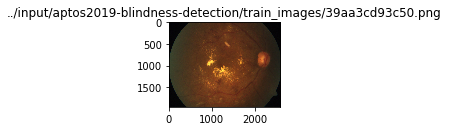

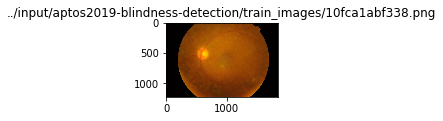

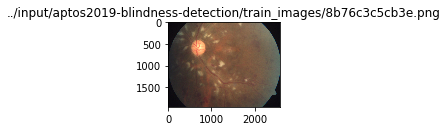

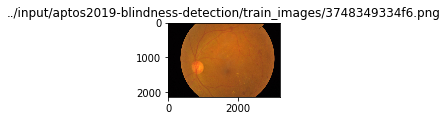

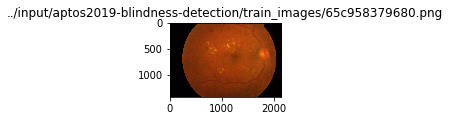

In [174]:
show_sample_images(pp/'train_images')

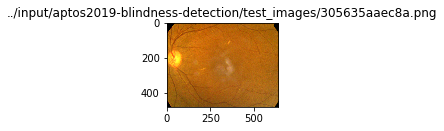

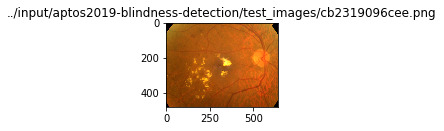

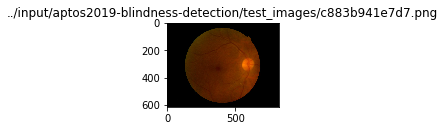

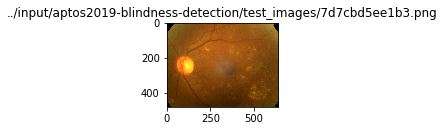

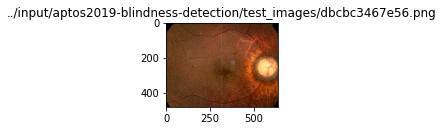

In [175]:
show_sample_images(pp/'test_images')

https://www.kaggle.com/c/aptos2019-blindness-detection/data
You can plan on the private test set consisting of 20GB of data across 13,000 images (approximately).

# stats of images

In [176]:
fnm = list((pp/'train_images').iterdir())[0]

im = Image.open(fnm)

npimg = np.array(im)

sz = npimg.size
zero_rate = (npimg ==0).sum()/sz
(sz, zero_rate, 
 npimg[:,:,0][npimg[:,:,0]>0].mean(),
 npimg[:,:,1][npimg[:,:,1]>0].mean(),
 npimg[:,:,2][npimg[:,:,2]>0].mean())

(12582528,
 0.003788825266273995,
 109.14488521930033,
 57.49575086834039,
 10.475044308666076)

In [177]:
def get_stats(fnm):
    im = Image.open(fnm)
    npimg = np.array(im)
    sz = npimg.size
    zero_rate = (npimg ==0).sum()/sz
    return (sz, zero_rate, 
 npimg[:,:,0][npimg[:,:,0]>0].mean(),
 npimg[:,:,1][npimg[:,:,1]>0].mean(),
 npimg[:,:,2][npimg[:,:,2]>0].mean())

In [181]:
fnms_train = list((pp/'train_images').iterdir())
stats_trn = [get_stats(fnm) for fnm in tqdm(fnms_train)]

100%|██████████| 3662/3662 [09:46<00:00,  7.94it/s]


In [178]:
fnms_test = list((pp/'test_images').iterdir())
stats_tst = [get_stats(fnm) for fnm in tqdm(fnms_test)]

100%|██████████| 1928/1928 [01:39<00:00, 19.40it/s]


In [182]:
pickle.dump(stats_trn, open(f'{p_o}/stats_trn.p', 'wb'))

pickle.dump(stats_tst, open(f'{p_o}/stats_tst.p', 'wb'))

In [180]:
sz_trn, zero_rate_trn, chn0_mean_trn, chn1_mean_trn, chn2_mean_trn = list(zip(*stats_trn)) 

In [89]:
sz_tst, zero_rate_tst, chn0_mean_tst, chn1_mean_tst, chn2_mean_tst = list(zip(*stats_tst)) 

In [90]:
def means(x1, x2):
    return np.mean(x1), np.mean(x2)

In [143]:
def prctils(x1, x2):
    lnspc = np.linspace(0,100,11)
    return list(zip(np.percentile(x1, lnspc), np.percentile(x2, lnspc)))

In [144]:
import seaborn as sns
def hists(x1, x2):
    sns.distplot(x1, hist=True, rug=False)
    sns.distplot(x2, hist=True, rug=False)
#     sns.legend()
#     sns.show()
# sns.distplot(target_0[['sepal length (cm)']], hist=False, rug=True)
# sns.distplot(target_1[['sepal length (cm)']], hist=False, rug=True)
# sns.distplot(target_2[['sepal length (cm)']], hist=False, rug=True)

#     sns.plt.show()

In [145]:
means(sz_trn, sz_tst)

(10636312.58274167, 3647112.0529045644)

In [146]:
means(zero_rate_trn, zero_rate_tst)

(0.12559091698705735, 0.04915811420722361)

In [147]:
means(chn0_mean_trn, chn0_mean_tst)

(118.1733996726915, 132.63045831561627)

In [148]:
means(chn1_mean_trn, chn1_mean_tst)

(65.16504229505186, 74.50299621938419)

In [149]:
means(chn2_mean_trn, chn2_mean_tst)

(21.45634502082599, 22.706753777589505)

In [150]:
prctils(sz_trn, sz_tst)

[(509076.0, 921600.0),
 (3307500.0, 921600.0),
 (3307500.0, 921600.0),
 (3307500.0, 921600.0),
 (6782232.0, 921600.0),
 (9437184.0, 921600.0),
 (12582528.0, 921600.0),
 (15201912.0, 921600.0),
 (15201912.0, 9437184.0),
 (20608128.0, 12582528.0),
 (36636672.0, 16889472.0)]

In [151]:
prctils(zero_rate_trn, zero_rate_tst)

[(0.0, 0.0),
 (2.1115764911676915e-06, 0.003787704664754174),
 (0.0037865840632343517, 0.010487847222222221),
 (0.008140285332056426, 0.010848524305555555),
 (0.01587348448146285, 0.011375868055555557),
 (0.047166137566137564, 0.012830946180555556),
 (0.07959086923658351, 0.01624175347222222),
 (0.11638796674225244, 0.022876085069444434),
 (0.1918773589783362, 0.03420095486111112),
 (0.5212188614739313, 0.07687437216511654),
 (0.6780696445041232, 0.678503672281901)]

In [152]:
prctils(chn0_mean_trn, chn0_mean_tst)

[(31.81797101792484, 35.13905737646685),
 (75.06057775495609, 94.23173178907588),
 (90.89564109843121, 109.18776765876288),
 (102.63772600724887, 118.66666936871367),
 (114.0040095487351, 126.02840581412289),
 (123.62116927528845, 133.47253084613038),
 (131.21583320204232, 140.97543866525123),
 (137.38435122200386, 148.2886272979326),
 (143.92274479815032, 158.16667263275593),
 (152.54998677195584, 171.47089833443),
 (216.76068043282976, 236.52809868421053)]

In [153]:
prctils(chn1_mean_trn, chn1_mean_tst)

[(22.533316629014045, 18.96783453182826),
 (41.784378038716575, 53.266340225871225),
 (49.70261457853689, 60.790269919541515),
 (55.46374914593803, 65.60782014959635),
 (61.32406575348833, 70.0529620276735),
 (66.17249940894857, 73.99747059113994),
 (70.0179293785134, 78.61928413428001),
 (74.14954172079014, 83.87363509868273),
 (79.29730123653741, 88.47179256111362),
 (86.60644468387343, 96.92613916093508),
 (136.3395467952384, 127.62365160493503)]

In [154]:
prctils(chn2_mean_trn, chn2_mean_tst)

[(2.47282471258778, 2.0075728328334272),
 (6.6729096879254906, 7.987735597073334),
 (9.441027915197871, 10.579080544910322),
 (12.236025959156532, 13.08997215398518),
 (14.712537423165681, 15.59358227176641),
 (17.61843338392395, 19.083036753690525),
 (21.303747725847543, 23.72432639382781),
 (25.640647387626085, 28.597418967100634),
 (31.583296127559677, 35.25227669633858),
 (41.60817338183457, 43.0210473542485),
 (105.52441850735617, 90.41168879056048)]

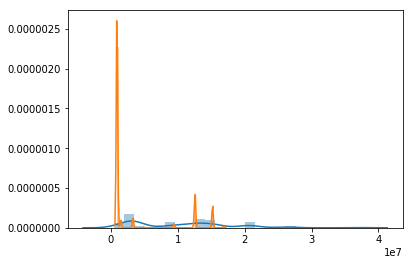

In [155]:
hists(sz_trn, sz_tst)

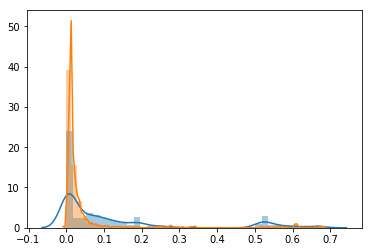

In [156]:
hists(zero_rate_trn, zero_rate_tst)

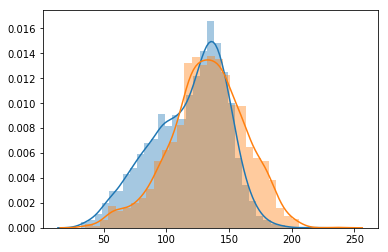

In [157]:
hists(chn0_mean_trn, chn0_mean_tst)

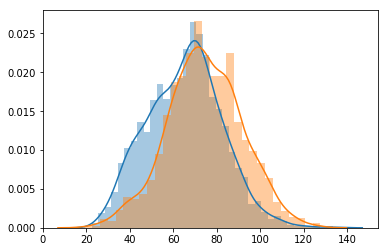

In [158]:
hists(chn1_mean_trn, chn1_mean_tst)

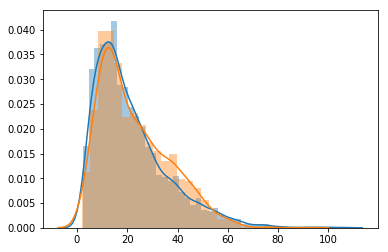

In [159]:
hists(chn2_mean_trn, chn2_mean_tst)

# show some cases

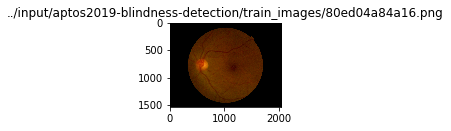

In [165]:
i = np.argsort(zero_rate_trn)[-1]
fn = list((pp/'train_images').iterdir())[i]
fig=plt.figure(figsize=(2, 2))
im = Image.open(fn)
plt.title(fn)
plt.imshow(im)

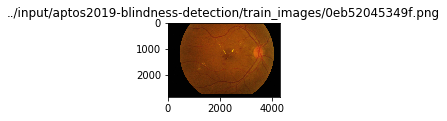

In [168]:
i = np.argsort(sz_trn)[-1]
fn = list((pp/'train_images').iterdir())[i]
fig=plt.figure(figsize=(2, 2))
im = Image.open(fn)
plt.title(fn)
plt.imshow(im)